In [1]:
import pandas as pd
import numpy as np   
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
%matplotlib inline
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 

In [6]:
import sys
sys.path += ['C:\\Users\\love-\\Documents\\Homeworks\\80-629\\week3-Supervised']


In [7]:
from utils import generate_data, plot_predictions, plot_svc_decision_function


ModuleNotFoundError: No module named 'utils'

# Question 2 - Classification

## Question 2.1

In [ ]:
data = np.load("a22_devoir_q2-classification.npz")
X = data["X"]
y = data["y"]


In [ ]:
print(y)


[0 2 0 2 2 0 0 2 1 0 2 1 1 2 2 0 2 1 2 1 1 0 1 1 1 0 1 0 1 1 0 0 1 2 2 2 2
 0 2 2 0 2 2 2 1 0 1 0 1 2 0 1 0 0 0 2 1 2 2 2 1 1 1 1 0 0 0 2 1 0 0 1 0 2
 0 0 0 1 0 1 1 2 2 0 2 2 0 2 0 2 0 1 1 2 0 1 2 1 1 1]


In [ ]:
print(X)
print(X[0])


[[ 0.15494743  0.37816252]
 [ 4.6781908   3.88829842]
 [ 0.06651722  0.3024719 ]
 [ 4.44780833  5.02608254]
 [ 4.77223375  5.00873958]
 [ 1.53277921  1.46935877]
 [ 0.17742614 -0.40178094]
 [ 4.68207696  5.33821665]
 [ 3.26816936  1.23011275]
 [-1.70627019  1.9507754 ]
 [ 5.5940149   5.15847131]
 [ 0.13905245  1.57791809]
 [ 2.50844214  2.11119275]
 [ 4.95077374  4.66826086]
 [ 6.08161797  5.66826397]
 [ 0.14404357  1.45427351]
 [ 4.9658792   5.85667136]
 [ 2.42111906  2.88331001]
 [ 5.28829541  4.89585062]
 [ 0.45814821  1.27554819]
 [ 0.34512589  2.30887379]
 [-0.51080514 -1.18063218]
 [ 1.81241247  2.96495855]
 [ 2.10351246  0.47278486]
 [ 2.0345496   2.55985975]
 [ 0.8644362  -0.74216502]
 [ 0.89523458  3.33366761]
 [ 1.86755799 -0.97727788]
 [-0.24772476  2.85123973]
 [ 4.32472605 -0.52163859]
 [ 1.23029068  1.20237985]
 [ 2.26975462 -1.45436567]
 [-0.25968511  4.41543178]
 [ 5.31261573  4.19897117]
 [ 5.38589528  5.41175208]
 [ 4.49989233  4.22761445]
 [ 4.35357155  5.13352543]
 

In [ ]:
X.shape


(100, 2)

In [ ]:
X.mean()


2.2693209543318646

In [ ]:
x1, x2 = zip(*X)


(array([ 4.,  8., 17.,  7., 11.,  6.,  8.,  9., 18., 12.]),
 array([-1.98079647, -1.18624022, -0.39168397,  0.40287228,  1.19742853,
         1.99198478,  2.78654103,  3.58109728,  4.37565353,  5.17020978,
         5.96476603]),
 <BarContainer object of 10 artists>)

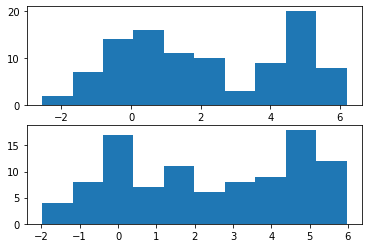

In [ ]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.hist(x1)
ax2.hist(x2)


(array([[ 2.,  7., 14., 16., 11., 10.,  3.,  9., 20.,  8.],
        [ 2.,  6., 13., 15., 10.,  6.,  9., 11., 17., 11.]]),
 array([-2.55298982, -1.6785336 , -0.80407738,  0.07037885,  0.94483507,
         1.81929129,  2.69374751,  3.56820373,  4.44265995,  5.31711617,
         6.19157239]),
 <a list of 2 BarContainer objects>)

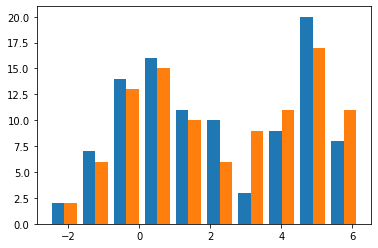

In [ ]:
plt.hist(X)


c:\Users\love-\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


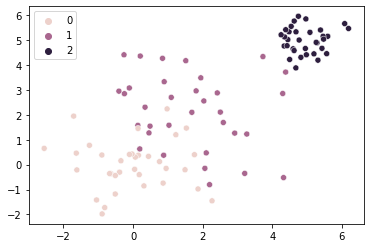

In [ ]:
sns.scatterplot(x1, x2, hue=y)
plt.show()


In [ ]:
# (4pt) Suite `a une exploration des donn´ees, que remarquez-vous?
# Il y a deux grands groupes que l'on peut appercevoir.
# Que pouvez-vous dire de la performance (taux de bonne classification) de test
# d’un mod`ele n’utilisant que des fronti`eres de d´ecision lin´eaire pour ce probl`eme?


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


In [ ]:
def OLS(X, y):
    # Note: on transforme simplement les cibles de {0,1} à {-1,+1}
    Y = (X_train[1]*2)-1
    Y = Y.reshape(2, 1)

    # On calcule les paramètres du modèle
    # (c'est le même calcul que celui de la semaine dernière pour w_ols)
    A = np.linalg.inv(np.dot(X.T, X))
    B = np.dot(X.T, Y)

    return np.dot(A, B)

# pour obtenir la frontière de décision visuellement


def calculate_decision_boundary(W):
    x_1 = np.linspace(-10, 10)  # <- pour x1;

    # Le but est donc de calculer x2 à partir de x1 et des poids.
    x_2 = (-W[0] - W[1]*x_1) / W[2]
    return x_1, x_2


In [ ]:
X = X_train

# On ajoute une colonne de 1 aux données
# Ça nous permet d'apprendre le biais (w0 dans: w_1x + w0)
X_b = np.array([np.ones(len(X)), X[:, 0], X[:, 1]]).T
####

Y = y_train
X_test = X_test

# Comme plus haut on ajoute une colonne de 1 aux données de test
X_test_b = np.array([np.ones(len(X_test)), X_test[:, 0], X_test[:, 1]]).T
###

Y_test = y_test

# 1) On (estime) entraîne les paramètres
# k est le nombre de classes et dim est la dimensionalité des données
W = OLS(X_b, Y)  # dim x k

# 2) Une fois les paramètres obtenus, on peut obtenir les prédictions
# a) for test data
y_x = np.dot(W.T, X_test_b.T)  # valeur réelle
pred_test = 1*(y_x > 0)[0]  # valeur binaire

# b) Idem pour l'ensemble d'entraînement
y_x = np.dot(W.T, X_b.T)
pred_train = 1*(y_x > 0)[0]


# 3) On calcule aussi la frontière de décision
#    pour pouvoir la visualiser
line_x, line_y = calculate_decision_boundary(W)


# 4) Rendu visuel
plot_predictions(X, Y, X_test, Y_test, pred_train, pred_test, line_x, line_y)


ValueError: shapes (3,67) and (2,1) not aligned: 67 (dim 1) != 2 (dim 0)

## Question 2.2

In [ ]:
# (6pt) Divide your dataset into training, validation, and test sets.
# The validation and test sets must each make up 20% of the total original dataset (so 40% in total).
# Make sure to use this parameter upon calling the appropriate sklearn function: random state=1234.
# Train a linear SVM on the training set for each one of these C hyperparameter values: {0.001,0.01,0.1,1,10}.
# For each value of C, what is the performance (accuracy) of the model on the training and validation sets?
#  Given your answer, obtain the performance of the best model on the test set.
#  We ask that you provide the few lines of code you used to divide the data, train the model, and obtain the accuracy.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1234)  # 0.25 x 0.8 = 0.2


In [ ]:
cs = [0.001, 0.01, 0.1, 1, 10]
for i, c in enumerate(cs):
    model = SVC(kernel='linear', C=c)
    model.fit(X_train, y_train)

    acc_train = (sum(model.predict(X_train) == y_train)/len(y_train))*100
    acc_validation = (sum(model.predict(X_val) == y_val)/len(y_val)) * 100

    print("With a value of C: ", c, ", the accuracy of the train model is", acc_train,
          "% anf<d the accuracy of the  validation model is", acc_validation, "%")


With a value of C:  0.001 , the accuracy of the train model is 41.66666666666667 % ans the accuracy of the  validation model is 30.0 %
With a value of C:  0.01 , the accuracy of the train model is 83.33333333333334 % ans the accuracy of the  validation model is 90.0 %
With a value of C:  0.1 , the accuracy of the train model is 86.66666666666667 % ans the accuracy of the  validation model is 90.0 %
With a value of C:  1 , the accuracy of the train model is 90.0 % ans the accuracy of the  validation model is 90.0 %
With a value of C:  10 , the accuracy of the train model is 90.0 % ans the accuracy of the  validation model is 95.0 %


In [ ]:
model = SVC(kernel='linear', C=10)
model.fit(X_train, y_train)

acc_test = (sum(model.predict(X_test) == y_test)/len(y_test)) * 100

print("With a value of C: ", c, ", the accuracy of the test model is", acc_test, "%")


With a value of C:  10 , the accuracy of the test model is 85.0 %


## Question 2.3

In [ ]:
# (4pt) Retrain the SVM model using 10-fold cross-validation for each of the C hyperparameter values from above.
# For each value of C, provide the training and validation accuracies as well as the performance on the test set of the best model.
#  Careful that you must use the same test set in both cases (previous question and this question)!
#  We ask that you provide the few lines of codes you used to divide the data, train the model, and obtain all accuracies.


In [ ]:
from sklearn.model_selection import cross_validate


In [ ]:
# We keep validation and train together unlike the question above
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234)


In [ ]:
for c in cs:
    model = SVC(kernel='linear', C=c, random_state=1234)
    test = model.fit(X_train, y_train)

    scores = cross_validate(test, X_train,  y_train,
                            cv=10,  return_train_score=True)

    #acc_train = (sum(model.predict(X_train)==y_train)/len(y_train))*100
    #acc_validation =  (sum(model.predict(X_val)==y_val)/len(y_val)) *100

    print("With a value of C: ", c, ", the mean accuracy of the train model is", scores['train_score'].mean(
    ), '% and the mean accuracy of the validation model is', scores['test_score'].mean(), '%')


With a value of C:  0.001 , the mean accuracy of the train model is 0.3875 % and the mean accuracy of the validation model is 0.3875 %
With a value of C:  0.01 , the mean accuracy of the train model is 0.861111111111111 % and the mean accuracy of the validation model is 0.85 %
With a value of C:  0.1 , the mean accuracy of the train model is 0.8777777777777779 % and the mean accuracy of the validation model is 0.8625 %
With a value of C:  1 , the mean accuracy of the train model is 0.9027777777777777 % and the mean accuracy of the validation model is 0.8625 %
With a value of C:  10 , the mean accuracy of the train model is 0.9152777777777776 % and the mean accuracy of the validation model is 0.875 %


In [ ]:
model = SVC(kernel='linear', C=10)

acc_test = (sum(test.predict(X_test) == y_test)/len(y_test)) * 100

print("With a value of C: ", c, ", the accuracy of the test model is", acc_test, "%")


With a value of C:  10 , the accuracy of the test model is 95.0 %


## Question 2.4 - (2pt) Explain precisely how is the validation performance evaluated when doing cross validation.


## Question 2.5 - (2pt) Do you obtain a better model with cross validation or without it? Justify your answer and explain your result.

# 

# Question 3 - Regression

## Question 3.1

In [2]:
q3 = pd.read_csv("C:\\Users\\love-\\Documents\\Homeworks\\reviews.tsv",
                 sep='\t', header=None, names=['Rating', 'Review'])
q3


,Rating,Review
0,5,I like the item pricing. My granddaughter want...
1,4,Love the magnet easel... great for moving to d...
2,5,Both sides are magnetic. A real plus when you...
3,5,Bought one a few years ago for my daughter and...
4,4,I have a stainless steel refrigerator therefor...
...,...,...
9995,1,There are multiple shapes part like oval and t...
9996,5,My 2 1/2 year old loves playing with these puz...
9997,5,I only wish I bought this toy sooner! It was ...
9998,5,My not quite 2 year old grandson took to this ...


In [3]:
q3.isna().sum()


Rating    0
Review    7
dtype: int64

In [4]:
check = q3[q3['Review'].isna()]
check


,Rating,Review
2339,5,NaN
2702,5,NaN
4653,5,NaN
8751,5,NaN
8770,2,NaN
9258,4,NaN
9690,5,NaN


In [5]:
q3 = q3.dropna()


In [6]:
q3['Review'] = q3.Review.str.replace('[^a-zA-Z]', ' ')


C:\Users\love-\AppData\Local\Temp/ipykernel_19164/3717941936.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  q3['Review'] = q3.Review.str.replace('[^a-zA-Z]', ' ')
C:\Users\love-\AppData\Local\Temp/ipykernel_19164/3717941936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q3['Review'] = q3.Review.str.replace('[^a-zA-Z]', ' ')


In [7]:
q3['Rating'].shape


(9993,)

In [8]:
q3['Review'].shape


(9993,)

In [9]:
q3.isna().sum()


Rating    0
Review    0
dtype: int64

In [10]:
y = q3['Rating']
X = q3['Review']


In [38]:
y_val.value_counts(normalize=True)

5    0.652826
4    0.192596
3    0.098049
2    0.030015
1    0.026513
Name: Rating, dtype: float64

In [39]:
from  imblearn.over_sampling import SMOTE

ValueError: could not convert string to float: 'I like the item pricing  My granddaughter wanted to mark on it but I wanted it just for the letters '

In [11]:
X[0]


'I like the item pricing  My granddaughter wanted to mark on it but I wanted it just for the letters '

## Question 3.2

. (3pt) On vous demande ensuite d’obtenir une repr´esentation sac à mots (bag-of-words) des caract´eristiques (features). sklearn offre des fonctions pour y arriver. Pour limiter le temps d’entraˆınement requis, on vous demande d’utiliser un maximumde2000motsdansvotre vocabulaire (max features=2000) et d’utiliser la liste des mots vides de sklearn (stop words="english"). Cette liste permet de retirer des mots qui à priori ne seront pas utiles a la pr´ediction. Utilisez les autres param`etres par d´efaut de la fonction. Nous vous demandons les quelques lignes de code de sklearn que vous avez utilis´ees pour encoder (et seulement encoder) les donn´ees d’entraˆınement, de validation et de test.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1234)  # 0.25 x 0.8 = 0.2


In [13]:
X_train


4946    This is a must have for any infant toy collect...
8509    My   year old received this game for Christmas...
6790    I bought this toy for my   boys    and    and ...
7615    Cute accessory for Calico Critters playhouse  ...
5438    After she killed a few sets of batteries   I p...
                              ...                        
2309    I have always wanted a chopper but found them ...
8211    Bought this set for my two year old twins that...
1232    Ok  if you have seen my other reviews then you...
3641    My cousins would always bring this game over f...
5500    She is really showing an interest in the state...
Name: Review, Length: 5995, dtype: object

In [14]:
y_train


4946    4
8509    4
6790    2
7615    4
5438    5
       ..
2309    4
8211    4
1232    4
3641    5
5500    5
Name: Rating, Length: 5995, dtype: int64

In [15]:
import nltk


In [16]:
from nltk.corpus import stopwords  # Import the stop word list
print(stopwords.words("english"))


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
print("Creating the bag of words...\n")


vectorizer = CountVectorizer(analyzer="word",
                             stop_words="english",
                             max_features=2000)


train_data_features = vectorizer.fit_transform(X_train)
valid_data_features = vectorizer.fit_transform(X_val)
test_data_features = vectorizer.fit_transform(X_test)


train_data_features = train_data_features.toarray()
valid_data_features = valid_data_features.toarray()
test_data_features = test_data_features.toarray()


Creating the bag of words...



In [44]:
#Oversample the dataset because we have too much y = 5
oversample = SMOTE()
train_data_features, y_train = oversample.fit_resample(train_data_features, y_train)
valid_data_features, y_val = oversample.fit_resample(valid_data_features, y_val)
test_data_features, y_test = oversample.fit_resample(test_data_features, y_test)

In [45]:
y_val.value_counts()

5    1305
3    1305
4    1305
1    1305
2    1305
Name: Rating, dtype: int64

In [46]:
train_data_features


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [47]:
print(train_data_features.shape)
print(y_train.shape)
# This has 9993 rows and 2000 features


(19360, 2000)
(19360,)


In [48]:
# Take a look at the words in the vocabulary
vocab = vectorizer.get_feature_names()
print(vocab)


['aa', 'abc', 'abilities', 'ability', 'able', 'absolutely', 'abuse', 'access', 'accessories', 'accidentally', 'accurate', 'act', 'action', 'actions', 'activities', 'activity', 'actual', 'actually', 'adapter', 'add', 'added', 'addictive', 'adding', 'addition', 'additional', 'adds', 'adjust', 'admit', 'adorable', 'adult', 'adults', 'advance', 'advanced', 'advantage', 'adventure', 'adventures', 'affair', 'affect', 'afraid', 'age', 'aged', 'ages', 'ago', 'agree', 'ahead', 'air', 'alike', 'allow', 'allowing', 'allows', 'alot', 'alphabet', 'alternative', 'amazing', 'amazingly', 'amazon', 'american', 'ancient', 'angle', 'animal', 'animals', 'annoying', 'answer', 'answers', 'apart', 'apparently', 'appeal', 'appealing', 'appear', 'appears', 'apples', 'appreciate', 'appropriate', 'area', 'aren', 'arkham', 'arm', 'armies', 'arms', 'arrived', 'art', 'arts', 'artwork', 'aside', 'ask', 'asked', 'asking', 'asks', 'aspect', 'assemble', 'assembled', 'assembly', 'assistance', 'attach', 'attached', 'atta

c:\Users\love-\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [49]:
import numpy as np

# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

# For each, print the vocabulary word and the number of times it
# appears in the training set
for tag, count in zip(vocab, dist):
    print(count, tag)


21 aa
29 abc
74 abilities
165 ability
411 able
20 absolutely
156 abuse
29 access
45 accessories
115 accidentally
73 accurate
34 act
44 action
66 actions
82 activities
399 activity
234 actual
100 actually
49 adapter
200 add
98 added
101 addictive
41 adding
48 addition
178 additional
307 adds
81 adjust
32 admit
47 adorable
33 adult
25 adults
407 advance
269 advanced
205 advantage
48 adventure
52 adventures
174 affair
44 affect
22 afraid
98 age
29 aged
23 ages
108 ago
41 agree
103 ahead
36 air
30 alike
29 allow
86 allowing
409 allows
32 alot
48 alphabet
111 alternative
125 amazing
163 amazingly
100 amazon
35 american
193 ancient
34 angle
46 animal
31 animals
58 annoying
76 answer
115 answers
74 apart
80 apparently
125 appeal
57 appealing
32 appear
97 appears
78 apples
42 appreciate
22 appropriate
77 area
22 aren
49 arkham
31 arm
45 armies
27 arms
51 arrived
160 art
45 arts
29 artwork
167 aside
29 ask
111 asked
49 asking
67 asks
29 aspect
353 assemble
115 assembled
33 assembly
70 assistanc

## Question 3.4

(3pt) Which of the following three distance functions ‘cosine’, ’euclidean’, and ‘manhattan’ do you deem more appropriate for this problem? Please justify

Cosine permet de mesurer la proximité entre deux vecteurs qui est représenté par les unités de texte (train_data_features) 
Ainsi, si les vecteurs ont le même angle; ils ont une similarité cosine de 1
Si les deux deux vecteurs sont orientés à 90 degrés, ils ont une simlarité cosine de 0 
Enfin, si elles sont orientés à 180 degrés, donc totalement opposé, ils ont une similarité de 0.
Cosine normalise ainsi la similarité entre deux points pour chaque vecteur.

La distance euclédienne permet de mesurer la distance entre deux points dans un espace tel qu'exprimé par la mesure de pythagore. De ce fait, elle ne prend pas en considération l'angle de ceux-ci comme la mesure cosine.

La distance Manhattan est la somme des différences absolues entre deux points. Dans la mesure où les points se trouvent sur le même x ou le même y; la distance euclédienne et manhattan sont équivalente.

Ainsi, ces deux mesures sont similaires et réagissent similairement à la distance entre les mots. Plus un vecteur à des mots différents, plus son poids pèsera sur la balance.




## Question 3.5 

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support


In [51]:
train_data_features


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [52]:
nb_neighboors = [1, 10, 50, 100, 1000]
for neighboors in nb_neighboors:
    knn = KNeighborsClassifier(neighboors,
                               metric='cosine')
    knn.fit(train_data_features, y_train)

    knn_acc_train = (sum(knn.predict(train_data_features)
                         == y_train)/len(y_train))*100
    knn_acc_valid = (
        sum(knn.predict(valid_data_features) == y_val)/len(y_val))*100

    print("With", neighboors, " number of neighboors, the accuracy of the train model is", knn_acc_train,
          "% and the accuracy of the valid model is", knn_acc_valid, "%")


With 1  number of neighboors, the accuracy of the train model is 83.88946280991736 % and the accuracy of the valid model is 17.24137931034483 %
With 10  number of neighboors, the accuracy of the train model is 60.85227272727273 % and the accuracy of the valid model is 19.908045977011493 %
With 50  number of neighboors, the accuracy of the train model is 48.97210743801653 % and the accuracy of the valid model is 18.590038314176248 %
With 100  number of neighboors, the accuracy of the train model is 43.1456611570248 % and the accuracy of the valid model is 19.54022988505747 %
With 1000  number of neighboors, the accuracy of the train model is 32.56198347107438 % and the accuracy of the valid model is 30.513409961685824 %


In [53]:
y_train.value_counts(normalize=True)


4    0.2
2    0.2
5    0.2
3    0.2
1    0.2
Name: Rating, dtype: float64

## Question 6

.5pt)Whatvalueofthehyperparameterprovidesthebestresults?Explain

## Question 10

In [54]:
from sklearn.neural_network import MLPClassifier
import random


In [55]:

alpha = [0.0, 0.5, 1.0]
learning_rates = [0.001, 0.01, 0.1]
nb_neurons = [10, 20, 30]
nb_hidden_layer = [10, 50, 100, 150, 500]


In [56]:
loss_train, loss_valid = [], []
list_nn_acc_valid, list_nn_acc_train, a_list, lr_list, neuron_list, layer_list, precision, recall = [
], [], [], [], [], [], [], []


for a in alpha:
    for lr in learning_rates:
        for neuron in nb_neurons:
            for count, layer in enumerate(nb_hidden_layer):
                nn = MLPClassifier(alpha=a,
                                   hidden_layer_sizes=(neuron, layer),
                                   random_state=1,
                                   learning_rate_init=lr,
                                   max_iter=100,
                                   early_stopping=True
                                   )
                nn.fit(train_data_features, y_train)

                nn_acc_train = nn.score(train_data_features, y_train)
                nn_acc_valid = nn.score(valid_data_features, y_val)

                unique, counts = np.unique(nn.predict(
                    valid_data_features), return_counts=True)

                loss_train.append(nn_acc_train)
                loss_valid.append(nn_acc_valid)

                print("With", a, lr, neuron, layer, " number of neighboors, the accuracy of the train model is", nn_acc_train,
                      "% and the accuracy of the valid model is", nn_acc_valid, "%")

                #Combien j'en ai mis dans mon train Data

                print(np.asarray((unique, (counts/len(y_val))*100)).T)

                #Combien j'ai pas pu prédire



                for i in np.unique(y_val):
                    lmao = (sum(nn.predict(valid_data_features)
                                != i)/len(y_val == i))*100
                    print(i, lmao)

                prf = precision_recall_fscore_support(y_val, nn.predict(
                    valid_data_features), average='weighted', zero_division=1)

                list_nn_acc_train.append(nn_acc_train)
                list_nn_acc_valid.append(nn_acc_valid)
                a_list.append(a)
                lr_list.append(lr)
                neuron_list.append(neuron)
                layer_list.append(layer)
                precision.append(prf[0])
                recall.append(prf[1])


With 0.0 0.001 10 10  number of neighboors, the accuracy of the train model is 0.7660640495867769 % and the accuracy of the valid model is 0.26298850574712646 %
[[ 1.          8.53639847]
 [ 2.         20.76628352]
 [ 3.         12.91954023]
 [ 4.         34.74329502]
 [ 5.         23.03448276]]
1 91.46360153256705
2 79.23371647509579
3 87.08045977011494
4 65.25670498084291
5 76.96551724137932
With 0.0 0.001 10 50  number of neighboors, the accuracy of the train model is 0.828099173553719 % and the accuracy of the valid model is 0.26022988505747124 %
[[ 1.          6.52873563]
 [ 2.         22.78927203]
 [ 3.         11.0651341 ]
 [ 4.         31.7394636 ]
 [ 5.         27.87739464]]
1 93.47126436781609
2 77.21072796934865
3 88.93486590038314
4 68.26053639846744
5 72.12260536398468
With 0.0 0.001 10 100  number of neighboors, the accuracy of the train model is 0.8150826446280992 % and the accuracy of the valid model is 0.26191570881226056 %
[[ 1.          8.45977011]
 [ 2.         18.0

In [57]:

data_tuples = list(zip(a_list, lr_list, neuron_list, layer_list,
                       list_nn_acc_train, list_nn_acc_valid, precision, recall))
q3_data = pd.DataFrame(data_tuples, columns=['L2 Regularizarion term',
                                             'Learning Rate',
                                             'Number of neurons',
                                             'Number of layers',
                                             'Accuracy of Train',
                                             'Acccuracy of Valid',
                                             'Precision',
                                             'Recall'])
q3_data


,L2 Regularizarion term,Learning Rate,Number of neurons,Number of layers,Accuracy of Train,Acccuracy of Valid,Precision,Recall
0,0.0,0.001,10,10,0.766064,0.262989,0.253502,0.262989
1,0.0,0.001,10,50,0.828099,0.260230,0.239497,0.260230
2,0.0,0.001,10,100,0.815083,0.261916,0.263603,0.261916
3,0.0,0.001,10,150,0.814773,0.262529,0.258885,0.262529
4,0.0,0.001,10,500,0.843647,0.265594,0.269716,0.265594
...,...,...,...,...,...,...,...,...
130,1.0,0.100,30,10,0.495248,0.272490,0.439099,0.272490
131,1.0,0.100,30,50,0.484659,0.279387,0.456687,0.279387
132,1.0,0.100,30,100,0.479184,0.267433,0.270995,0.267433
133,1.0,0.100,30,150,0.483161,0.293640,0.449746,0.293640


In [58]:
q3_data.sort_values(['Acccuracy of Valid', 'Accuracy of Train'], ascending=[False, False])

,L2 Regularizarion term,Learning Rate,Number of neurons,Number of layers,Accuracy of Train,Acccuracy of Valid,Precision,Recall
60,0.5,0.010,10,10,0.702273,0.320613,0.316792,0.320613
65,0.5,0.010,20,10,0.769267,0.313870,0.294263,0.313870
111,1.0,0.010,20,50,0.721746,0.313870,0.310658,0.313870
105,1.0,0.010,10,10,0.677686,0.312490,0.312741,0.312490
110,1.0,0.010,20,10,0.726808,0.311724,0.293287,0.311724
...,...,...,...,...,...,...,...,...
129,1.0,0.100,20,500,0.476653,0.253487,0.268060,0.253487
48,0.5,0.001,10,150,0.788171,0.249195,0.263461,0.249195
78,0.5,0.100,10,150,0.200000,0.200000,0.840000,0.200000
79,0.5,0.100,10,500,0.200000,0.200000,0.840000,0.200000


In [59]:
prf = precision_recall_fscore_support(y_val, nn.predict(
    valid_data_features), average='weighted', zero_division=1)
prf[0]


0.2986281477154849

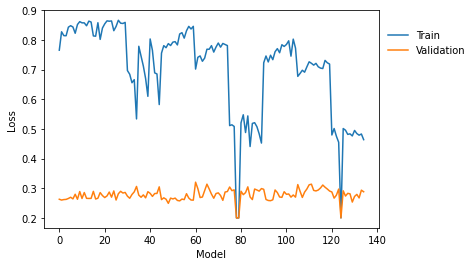

In [60]:
plt.plot(loss_train, label='Train')
plt.plot(loss_valid, label='Validation')

plt.xlabel('Model')
plt.ylabel('Loss')

# Ghosting the legend
leg = plt.gca().legend(loc='center left', bbox_to_anchor=(1, .85))
leg.get_frame().set_alpha(0)


In [61]:
print(nn_acc_train)


0.46410123966942146


In [62]:
print(np.asarray((unique, counts)).T)


[[   1  427]
 [   2 3215]
 [   3 1272]
 [   4  785]
 [   5  826]]
